In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print(df.shape), 
df.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

# DATA PREPROCESSING 

In [22]:
def handle_captial_gain(df):
    df[' capital-gain'] = np.where(df[' capital-gain'] == 0, np.nan, df[' capital-gain'])
    df[' capital-gain'] = np.log(df[' capital-gain'])
    df[' capital-gain'] = df[' capital-gain'].replace(np.nan,0)

In [23]:
handle_captial_gain(df)

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' capital-gain', ylabel='Density'>

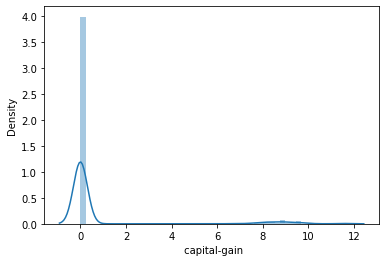

In [26]:
sns.distplot(df[' capital-gain'])

In [27]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [30]:
df[' salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' hours-per-week'>

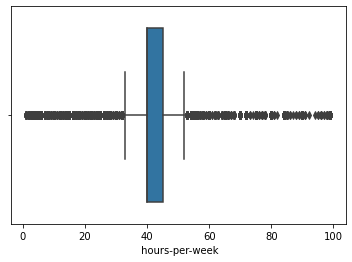

In [31]:
sns.boxplot(df[' hours-per-week'])

In [40]:
def remove_outlier_hours(df):
    IQR = df[' hours-per-week'].quantile(.75) - df[' hours-per-week'].quantile(.25)
    lower_range  = df[' hours-per-week'].quantile(.25) - (1.5*IQR)
    upper_range  = df[' hours-per-week'].quantile(.75) + (1.5*IQR)
    df.loc[df[' hours-per-week'] <= lower_range, ' hours-per-week'] = lower_range
    df.loc[df[' hours-per-week'] >= upper_range, ' hours-per-week'] = upper_range

In [41]:
remove_outlier_hours(df)

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' hours-per-week'>

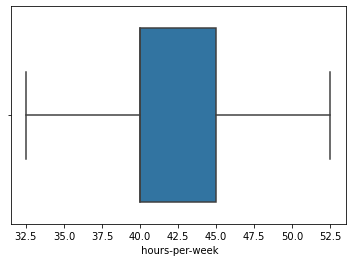

In [42]:
sns.boxplot(df[' hours-per-week'])

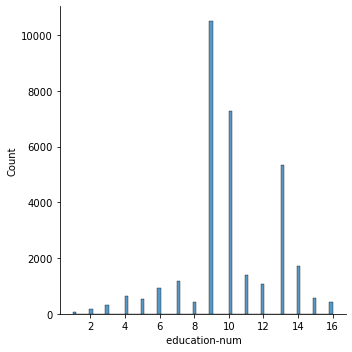

In [43]:
sns.displot(df[' education-num'])

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' education-num'>

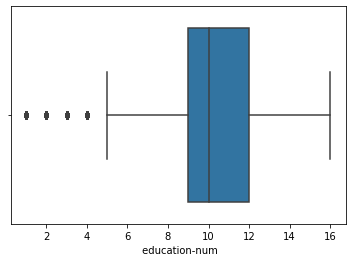

In [45]:
sns.boxplot(df[' education-num'])

In [46]:
def remove_outliers_edu_num(df):
    IQR = df[' education-num'].quantile(0.75)- df[' education-num'].quantile(0.25)
    lower_range = df[' education-num'].quantile(0.25) - (1.5*IQR)
    upper_range = df[' education-num'].quantile(0.75) + (1.5*IQR)
    df.loc[df[' education-num'] <= lower_range, ' education-num'] = lower_range
    df.loc[df[' education-num'] >= upper_range, ' education-num'] = upper_range

In [47]:
remove_outliers_edu_num(df)

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' education-num'>

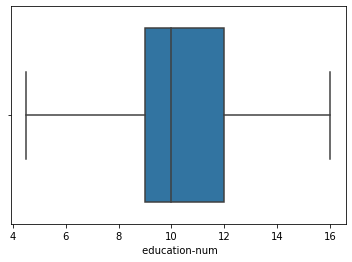

In [48]:
sns.boxplot(df[' education-num'])

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' capital-loss', ylabel='Density'>

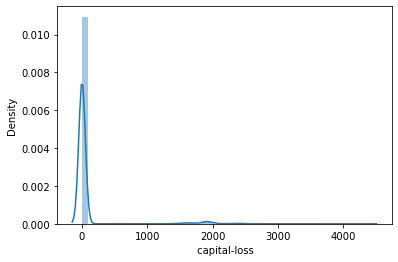

In [51]:
sns.distplot(df[' capital-loss'])

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' capital-loss'>

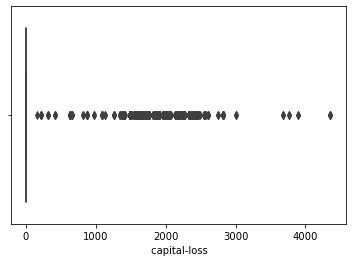

In [52]:
sns.boxplot(df[' capital-loss'])

In [60]:
def capital_log_loss(df):
    df[' capital-loss'] =  np.where(df[' capital-loss']==0, np.nan, df[ ' capital-loss'])
    df[' capital-loss'] =  np.log(df[' capital-loss'])
    df[' capital-loss'] =  df[' capital-loss'].replace(np.nan, 0)

In [61]:
capital_log_loss(df)

C:\Users\anisa\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\anisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' capital-loss', ylabel='Density'>

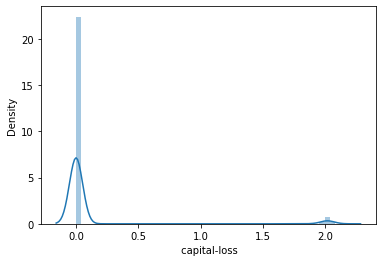

In [62]:
sns.distplot(df[' capital-loss'])

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' capital-loss'>

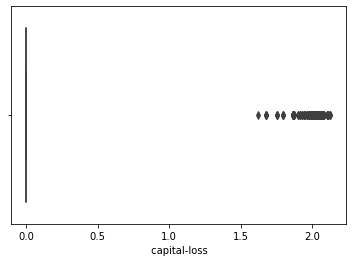

In [63]:
sns.boxplot(df[' capital-loss'])

In [65]:
def remove_outlier_capital_loss(df):
    IQR = df[' capital-loss'].quantile(0.75)- df[' capital-loss'].quantile(0.25)
    lower_range = df[' capital-loss'].quantile(0.25) - (1.5*IQR)
    upper_range = df[' capital-loss'].quantile(0.75) + (1.5*IQR)
    df.loc[df[' capital-loss'] <= lower_range, ' capital-loss'] = lower_range
    df.loc[df[' capital-loss'] >= upper_range, ' capital-loss'] = upper_range

In [66]:
remove_outlier_capital_loss(df)

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' capital-loss'>

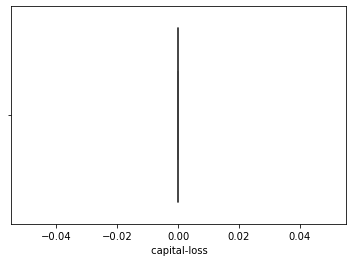

In [67]:
sns.boxplot(df[' capital-loss'])

In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [70]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [104]:
df[' salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [105]:
def feature_engineering(df):
    df[' salary']= np.where(df[' salary'] == ' >50K',1,0)
    
    df[' sex'] = np.where(df[' sex'] == 'Male',1,0)
    
    label_enco_race = { value: key for key,value in enumerate(df[' race'].unique())}
    df[' race'] = df[' race'].map(label_enco_race)
    
    label_enco_rel = {value:key for key, value in enumerate(df[' relationship'].unique())}
    df[' relationship'] = df[' relationship'].map(label_enco_rel)
    
    label_enco_occ = {value :  key for key , value in enumerate(df[' occupation'].unique())}
    df[' occupation'] = df[' occupation'].map(label_enco_occ)
    
    label_enco_marital = { value: key for key, value in enumerate(df[' marital-status'].unique())}
    df[' marital-status'] = df[' marital-status'].map(label_enco_marital)
    
    label_enco_educ = {value: key for key,value in enumerate(df[' education'].unique())}
    df[' education'] = df[' education'].map(label_enco_educ)
    
    label_enco_work = {value: key for key, value in enumerate(df[' workclass'].unique())}
    df[' workclass'] = df[' workclass'].map(label_enco_work)
    
    label_enco_native = {value: key for key, value in enumerate(df[' native-country'].unique())}
    df[' native-country'] = df[' native-country'].map(label_enco_native)

In [73]:
df = df.drop(' fnlwgt', axis=1)

## Data before Transformation:

In [74]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [106]:
feature_engineering(df)

## Data After Transformation:

In [107]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [110]:
X = df[['age', ' workclass', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',]]

In [111]:
y = df[' salary']

In [112]:
X = sc.fit_transform(X)
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

# TRAIN TEST SPILT

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(24420, 13) (24420,)
(8141, 13) (8141,)


# Model 

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
LR = LogisticRegression()

In [117]:
LR.fit(X_train,y_train)

LogisticRegression()

In [118]:
y_pred= LR.predict(X_test)

In [119]:
result = pd.DataFrame({ 'Actual': y_test, 'predicted' :  y_pred})

In [120]:
result

,Actual,predicted
9646,0,0
709,0,0
7385,1,1
16671,0,0
21932,0,0
...,...,...
31540,0,0
18566,1,0
13141,0,0
14286,0,0


In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [122]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5878  425]
 [1096  742]]
0.8131679154894976
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      6303
           1       0.64      0.40      0.49      1838

    accuracy                           0.81      8141
   macro avg       0.74      0.67      0.69      8141
weighted avg       0.80      0.81      0.80      8141



## Thank You !!!